In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
def percent_scaling(series):
    return (series / 100)

def cpu_scaling(series):
    return (series * 4 / 100)

def single_cpu_scaling(series):
    return (((series - 100) * (-1)) / 100)

def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

In [6]:
cpu_df = pd.read_csv('../results/numa-matrix.csv')

cpu_df['cache_hit_rate_0'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_0']) / cpu_df['cache_hit_0']
cpu_df['cache_hit_rate_1'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_1']) / cpu_df['cache_hit_1']
cpu_df['cache_hit_rate_2'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_2']) / cpu_df['cache_hit_2']
cpu_df['cache_hit_rate_3'] = (cpu_df['cache_hit_0'] - cpu_df['cache_miss_3']) / cpu_df['cache_hit_3']
cpu_df['cache_hit_rate_avg'] = (cpu_df['cache_hit_rate_0'] + cpu_df['cache_hit_rate_1'] + cpu_df['cache_hit_rate_2'] + cpu_df['cache_hit_rate_3']) / 4

cpu_df['br_miss_rate_0'] = cpu_df['br_miss_0'] / cpu_df['br_insns_0']
cpu_df['br_miss_rate_1'] = cpu_df['br_miss_1'] / cpu_df['br_insns_1']
cpu_df['br_miss_rate_2'] = cpu_df['br_miss_2'] / cpu_df['br_insns_2']
cpu_df['br_miss_rate_3'] = cpu_df['br_miss_3'] / cpu_df['br_insns_3']
cpu_df['br_miss_rate_avg'] = (cpu_df['br_miss_rate_0'] + cpu_df['br_miss_rate_1'] + cpu_df['br_miss_rate_2'] + cpu_df['br_miss_rate_3']) / 4

cpu_df['clock_speed'] = (cpu_df['insns_0'] + cpu_df['insns_1'] + cpu_df['insns_2'] + cpu_df['insns_3']) / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['insns_0_norm'] = cpu_df['insns_0'] / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['insns_1_norm'] = cpu_df['insns_1'] / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df = cpu_df.drop(index=0)

cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed,insns_0_norm,insns_1_norm
1,2691,1.944,41410,17962,6689,49,1839,269,12316,1000000,...,0.095378,1.325407,0.146275,0.145540,0.145161,0.071332,0.127077,110.913761,10.985933,5.401835
2,4241,1.944,34196,15660,5781,47,1506,217,8640,1000000,...,0.082494,1.168169,0.144090,0.142410,0.136150,0.066108,0.122190,114.068387,10.103226,6.045806
3,5791,1.944,34102,15662,5788,47,1504,215,8694,1000000,...,0.081686,1.168610,0.142952,0.133020,0.133020,0.065680,0.118668,115.636129,10.104516,6.018710
4,7334,1.944,34136,15662,5786,43,1506,212,8704,1000000,...,0.082869,1.168906,0.140770,0.133020,0.134585,0.063811,0.118047,115.077771,10.150356,6.072586
5,8921,1.696,39433,18766,6861,46,1889,266,11450,1000000,...,0.102554,1.342222,0.140815,0.140845,0.133020,0.064334,0.119754,113.204789,11.824827,5.908633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44534,85867080,2.124,385838,281251,104991,1052,71448,1853,188760,1000000,...,29.744970,22.591855,0.025935,0.131054,0.128940,0.126062,0.102998,201.801418,181.335268,6.800774
44535,85868638,1.864,383606,280188,104460,1042,71309,1760,187630,1000000,...,29.586119,22.480668,0.024681,0.128205,0.128940,0.126062,0.101972,200.195764,179.838254,6.772786
44536,85870213,1.864,384577,281824,104941,1030,72172,1799,188162,1000000,...,29.797785,22.601882,0.024927,0.129630,0.128940,0.128205,0.102925,199.099048,178.935873,6.714921
44537,85871770,1.864,380460,278786,103895,997,71127,1737,186062,1000000,...,29.484530,22.373209,0.024421,0.128205,0.130372,0.129630,0.103157,199.432241,179.053308,6.808606


In [7]:
#cpu cycles over time
cpu_df['cpu_cycle_0_per_time'] = cpu_df['cpu_cycles_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cpu_cycle_1_per_time'] = cpu_df['cpu_cycles_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cpu_cycle_2_per_time'] = cpu_df['cpu_cycles_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cpu_cycle_3_per_time'] = cpu_df['cpu_cycles_3']  / (cpu_df['time'] - cpu_df['time'].shift())
#isn't clockspeed instructions/time?
#branch miss rate over time
cpu_df['br_miss_0_per_time'] = cpu_df['br_miss_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['br_miss_1_per_time'] = cpu_df['br_miss_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['br_miss_2_per_time'] = cpu_df['br_miss_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['br_miss_3_per_time'] = cpu_df['br_miss_3']  / (cpu_df['time'] - cpu_df['time'].shift())
#cache_miss_rate over time
cpu_df['cache_miss_0_per_time'] = cpu_df['cache_miss_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_miss_1_per_time'] = cpu_df['cache_miss_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_miss_2_per_time'] = cpu_df['cache_miss_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_miss_3_per_time'] = cpu_df['cache_miss_3']  / (cpu_df['time'] - cpu_df['time'].shift())
#cache_hit_rate over time
cpu_df['cache_hit_0_per_time'] = cpu_df['cache_hit_0']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_hit_1_per_time'] = cpu_df['cache_hit_1']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_hit_2_per_time'] = cpu_df['cache_hit_2']  / (cpu_df['time'] - cpu_df['time'].shift())
cpu_df['cache_hit_3_per_time'] = cpu_df['cache_hit_3']  / (cpu_df['time'] - cpu_df['time'].shift())

In [8]:
cpu_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,br_miss_2_per_time,br_miss_3_per_time,cache_miss_0_per_time,cache_miss_1_per_time,cache_miss_2_per_time,cache_miss_3_per_time,cache_hit_0_per_time,cache_hit_1_per_time,cache_hit_2_per_time,cache_hit_3_per_time
1,2691,1.944,41410,17962,6689,49,1839,269,12316,1000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4241,1.944,34196,15660,5781,47,1506,217,8640,1000000,...,0.056129,1.140000,0.030323,0.013548,0.013548,0.660000,3.729677,2.065161,2.065806,37.210968
3,5791,1.944,34102,15662,5788,47,1504,215,8694,1000000,...,0.054839,1.156129,0.030323,0.013548,0.016129,0.641290,3.734194,2.065806,2.065806,37.863226
4,7334,1.944,34136,15662,5786,43,1506,212,8704,1000000,...,0.055736,1.114064,0.027868,0.013610,0.016202,0.636423,3.749838,2.074530,2.075178,37.570318
5,8921,1.696,39433,18766,6861,46,1889,266,11450,1000000,...,0.053560,1.071834,0.028986,0.013233,0.014493,0.591052,4.323251,2.017013,2.017013,36.392565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44534,85867080,2.124,385838,281251,104991,1052,71448,1853,188760,1000000,...,0.058027,0.057382,0.678272,0.013540,0.016119,0.013540,67.692456,2.271438,2.268214,2.275306
44535,85868638,1.864,383606,280188,104460,1042,71309,1760,187630,1000000,...,0.057766,0.057125,0.668806,0.013479,0.018614,0.013479,67.047497,2.260591,2.257381,2.265725
44536,85870213,1.864,384577,281824,104941,1030,72172,1799,188162,1000000,...,0.057143,0.057143,0.653968,0.013968,0.018413,0.014603,66.629206,2.235556,2.233651,2.235556
44537,85871770,1.864,380460,278786,103895,997,71127,1737,186062,1000000,...,0.058446,0.058446,0.640334,0.013487,0.016699,0.013487,66.727681,2.261400,2.260116,2.262685


In [13]:
cpu_df['cpu_cycle_0_per_time']

1               NaN
2         22.061935
3         22.001290
4         22.123137
5         24.847511
            ...    
44534    248.767247
44535    246.216945
44536    244.175873
44537    244.354528
44538    245.354153
Name: cpu_cycle_0_per_time, Length: 44538, dtype: float64

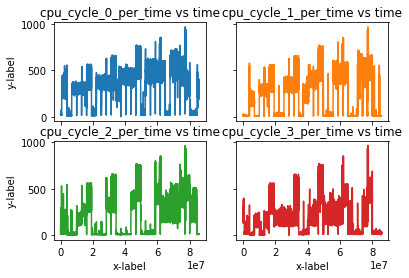

In [23]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.time, cpu_df['cpu_cycle_0_per_time'])
axs[0, 0].set_title('cpu_cycle_0_per_time vs time')
axs[0, 1].plot(cpu_df.time, cpu_df['cpu_cycle_1_per_time'], 'tab:orange')
axs[0, 1].set_title('cpu_cycle_1_per_time vs time')
axs[1, 0].plot(cpu_df.time, cpu_df['cpu_cycle_2_per_time'], 'tab:green')
axs[1, 0].set_title('cpu_cycle_2_per_time vs time')
axs[1, 1].plot(cpu_df.time, cpu_df['cpu_cycle_3_per_time'], 'tab:red')
axs[1, 1].set_title('cpu_cycle_3_per_time vs time')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()



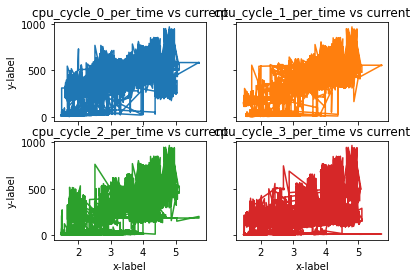

In [24]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.current, cpu_df['cpu_cycle_0_per_time'])
axs[0, 0].set_title('cpu_cycle_0_per_time vs current')
axs[0, 1].plot(cpu_df.current, cpu_df['cpu_cycle_1_per_time'], 'tab:orange')
axs[0, 1].set_title('cpu_cycle_1_per_time vs current')
axs[1, 0].plot(cpu_df.current, cpu_df['cpu_cycle_2_per_time'], 'tab:green')
axs[1, 0].set_title('cpu_cycle_2_per_time vs current')
axs[1, 1].plot(cpu_df.current, cpu_df['cpu_cycle_3_per_time'], 'tab:red')
axs[1, 1].set_title('cpu_cycle_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


In [33]:
cpu_cycles_current = cpu_df[['current', 'cpu_cycle_0_per_time','cpu_cycle_1_per_time','cpu_cycle_2_per_time','cpu_cycle_3_per_time']].sample(n=2000, random_state=1)

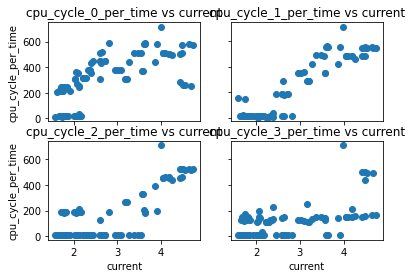

In [36]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_0_per_time'])
axs[0, 0].set_title('cpu_cycle_0_per_time vs current')
axs[0, 1].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_1_per_time'])
axs[0, 1].set_title('cpu_cycle_1_per_time vs current')
axs[1, 0].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_2_per_time'])
axs[1, 0].set_title('cpu_cycle_2_per_time vs current')
axs[1, 1].scatter(cpu_cycles_current.current, cpu_cycles_current['cpu_cycle_3_per_time'])
axs[1, 1].set_title('cpu_cycle_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='current', ylabel='cpu_cycle_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

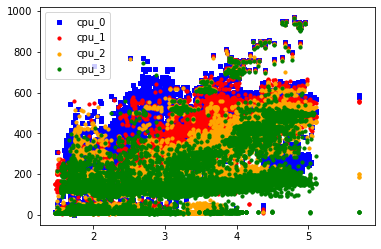

In [47]:

plt.scatter(cpu_df.current, cpu_df['cpu_cycle_0_per_time'], s=10, c='b', marker="s", label='cpu_0')
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_1_per_time'], s=10, c='r', marker="o", label='cpu_1')
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_2_per_time'], s=10, c='orange', marker="o", label='cpu_2')
plt.scatter(cpu_df.current, cpu_df['cpu_cycle_3_per_time'], s=10, c='g', marker="o", label='cpu_3')
plt.legend(loc='upper left')
plt.show()

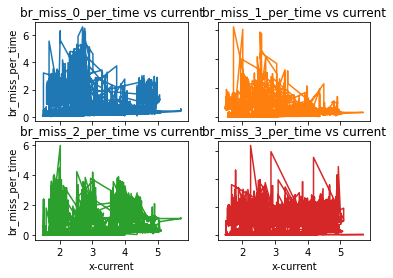

In [38]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.current, cpu_df['br_miss_0_per_time'])
axs[0, 0].set_title('br_miss_0_per_time vs current')
axs[0, 1].plot(cpu_df.current, cpu_df['br_miss_1_per_time'], 'tab:orange')
axs[0, 1].set_title('br_miss_1_per_time vs current')
axs[1, 0].plot(cpu_df.current, cpu_df['br_miss_2_per_time'], 'tab:green')
axs[1, 0].set_title('br_miss_2_per_time vs current')
axs[1, 1].plot(cpu_df.current, cpu_df['br_miss_3_per_time'], 'tab:red')
axs[1, 1].set_title('br_miss_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='x-current', ylabel='br_miss_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

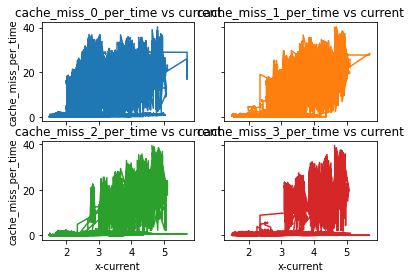

In [43]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.current, cpu_df['cache_miss_0_per_time'])
axs[0, 0].set_title('cache_miss_0_per_time vs current')
axs[0, 1].plot(cpu_df.current, cpu_df['cache_miss_1_per_time'], 'tab:orange')
axs[0, 1].set_title('cache_miss_1_per_time vs current')
axs[1, 0].plot(cpu_df.current, cpu_df['cache_miss_2_per_time'], 'tab:green')
axs[1, 0].set_title('cache_miss_2_per_time vs current')
axs[1, 1].plot(cpu_df.current, cpu_df['cache_miss_3_per_time'], 'tab:red')
axs[1, 1].set_title('cache_miss_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='x-current', ylabel='cache_miss_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

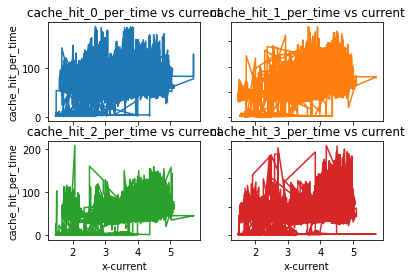

In [45]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(cpu_df.current, cpu_df['cache_hit_0_per_time'])
axs[0, 0].set_title('cache_hit_0_per_time vs current')
axs[0, 1].plot(cpu_df.current, cpu_df['cache_hit_1_per_time'], 'tab:orange')
axs[0, 1].set_title('cache_hit_1_per_time vs current')
axs[1, 0].plot(cpu_df.current, cpu_df['cache_hit_2_per_time'], 'tab:green')
axs[1, 0].set_title('cache_hit_2_per_time vs current')
axs[1, 1].plot(cpu_df.current, cpu_df['cache_hit_3_per_time'], 'tab:red')
axs[1, 1].set_title('cache_hit_3_per_time vs current')

for ax in axs.flat:
    ax.set(xlabel='x-current', ylabel='cache_hit_per_time')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [4]:
cpu_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.379546
insns_0               0.362891
cache_hit_0           0.350475
cache_miss_0          0.397269
br_insns_0            0.207099
br_miss_0             0.084071
bus_cycles_0          0.379859
freq_0                0.131316
cpu_cycles_1          0.477603
insns_1               0.474445
cache_hit_1           0.469217
cache_miss_1          0.527512
br_insns_1            0.320919
br_miss_1             0.165341
bus_cycles_1          0.478266
freq_1                0.131316
cpu_cycles_2          0.360475
insns_2               0.354235
cache_hit_2           0.349350
cache_miss_2          0.386839
br_insns_2            0.254643
br_miss_2             0.135926
bus_cycles_2          0.361188
freq_2                0.131316
cpu_cycles_3          0.257701
insns_3               0.266003
cache_hit_3           0.279737
cache_miss_3          0.229825
br_insns_3            0.255929
br_miss_3             0.262884
bus_cycles_3          0.259226
freq_3  

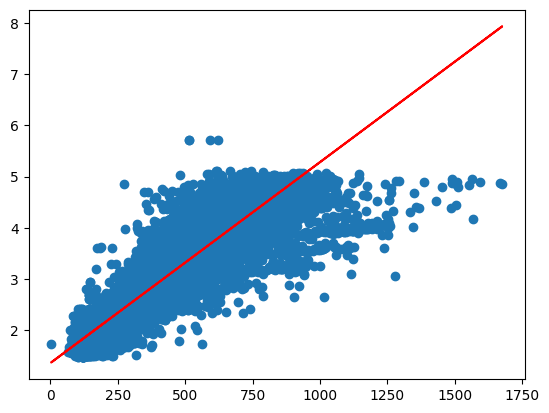

In [5]:
cpu_linear = LinearRegression()
cpu_linear.fit(cpu_df['clock_speed'].values.reshape(-1, 1),
               cpu_df['current'].values.reshape(-1, 1))

plt.scatter(cpu_df['clock_speed'].values.reshape(-1, 1),
            cpu_df['current'].values.reshape(-1, 1))
plt.plot(cpu_df['clock_speed'].values.reshape(-1, 1),
         cpu_linear.predict(cpu_df['clock_speed'].values.reshape(-1, 1)),
         color='red')

In [6]:
#filtering out outliers to better see patterns in cpu_cycles

# calculate IQR for column A
Q1 = cpu_df['clock_speed'].quantile(0.25)
Q3 = cpu_df['clock_speed'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = cpu_df[(cpu_df['clock_speed'] < Q1 - threshold * IQR) | (cpu_df['clock_speed'] > Q3 + threshold * IQR)]

In [7]:
filtered_cpu = cpu_df.drop(outliers.index)

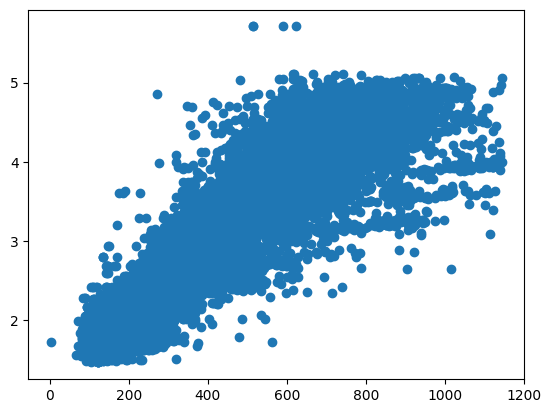

In [8]:
plt.scatter(filtered_cpu["clock_speed"].values.reshape(-1, 1),
            filtered_cpu['current'].values.reshape(-1, 1))

<Axes: xlabel='time'>

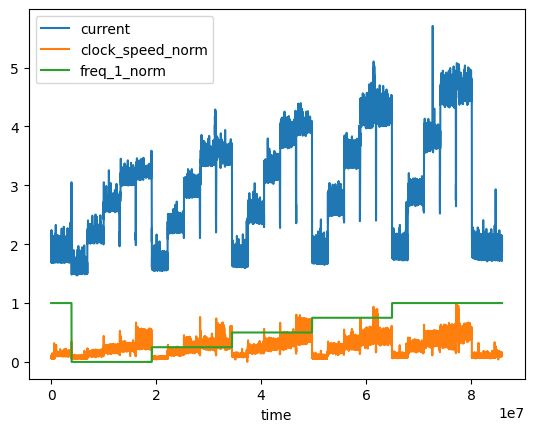

In [9]:
cpu_df['clock_speed_norm'] = min_max_scaling(cpu_df['clock_speed'])
cpu_df['freq_1_norm'] = min_max_scaling(cpu_df['freq_1'])

cpu_df.plot(x='time', y=['current', 'clock_speed_norm', 'freq_1_norm'])

In [51]:
from sklearn.model_selection import train_test_split
cpu_df=cpu_df.dropna()
df_X = cpu_df.drop(columns=['current', 'time'])
df_Y = cpu_df['current'].astype(int)
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, random_state=42, test_size=0.2)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_dev, y_dev)
print(rf.score(X_test, y_test))
y_predict=rf.predict(X_test)
print(classification_report(y_test, y_predict))


KeyboardInterrupt: 

In [ ]:
num_estimators = [100, 200, 300, 400, 500] 
min_samples_leaves = [1, 2, 4, 8, 16]

best_params = [-1, -1]
highest_f1_score = -1
best_model = None
for num_estimator in num_estimators:
    for min_samples_leaf in min_samples_leaves:
        rf = RandomForestClassifier(n_estimators=num_estimator, min_samples_leaf = min_samples_leaf, random_state=42)
        rf.fit(X_dev, y_dev)
        y_pred = rf.predict(X_test)
        f1 = f1_score(y_test, y_pred, pos_label=0)
        print(num_estimator, min_samples_leaf, f1)
        if highest_f1_score < f1:
            highest_f1_score = f1
            best_params = [num_estimator, min_samples_leaf]
            best_model = rf

print("The accuracy for the optimal model was:", highest_f1_score, "with", best_params[0], "estimators and", best_params[1], "min samples per leaf.")

In [12]:
feature_names = df_X.columns
feature_imps = zip(feature_names, rf.feature_importances_)
feature_imps = sorted(list(feature_imps), key=lambda x: x[1], reverse=True)
feature_imps

[('cpu_cycles_1', 0.6923701984825767),
 ('bus_cycles_0', 0.05523584846472832),
 ('bus_cycles_2', 0.054956656521834464),
 ('cpu_cycles_0', 0.03133829264790254),
 ('cpu_cycles_3', 0.03035629072385114),
 ('clock_speed', 0.014383996931362808),
 ('clock_speed_norm', 0.012908175401605845),
 ('bus_cycles_1', 0.009217138015019617),
 ('cache_miss_2', 0.0059937163033252335),
 ('cache_hit_rate_avg', 0.005752201299703807),
 ('freq_1', 0.005104919426929672),
 ('freq_3', 0.0044581602322561805),
 ('freq_2', 0.004007305433697092),
 ('freq_0', 0.0039223759949516095),
 ('cache_miss_0', 0.003867700713674041),
 ('br_miss_rate_avg', 0.0036763234845420623),
 ('insns_2', 0.003652775764623073),
 ('br_miss_rate_3', 0.0033321781721686664),
 ('br_insns_2', 0.003257366507838882),
 ('cpu_cycles_2', 0.003068652048985963),
 ('insns_1_norm', 0.0029075482717501842),
 ('br_miss_rate_0', 0.0029005345873619258),
 ('br_miss_rate_2', 0.0027274869571907666),
 ('bus_cycles_3', 0.002689801889357241),
 ('cache_hit_rate_0', 0.0

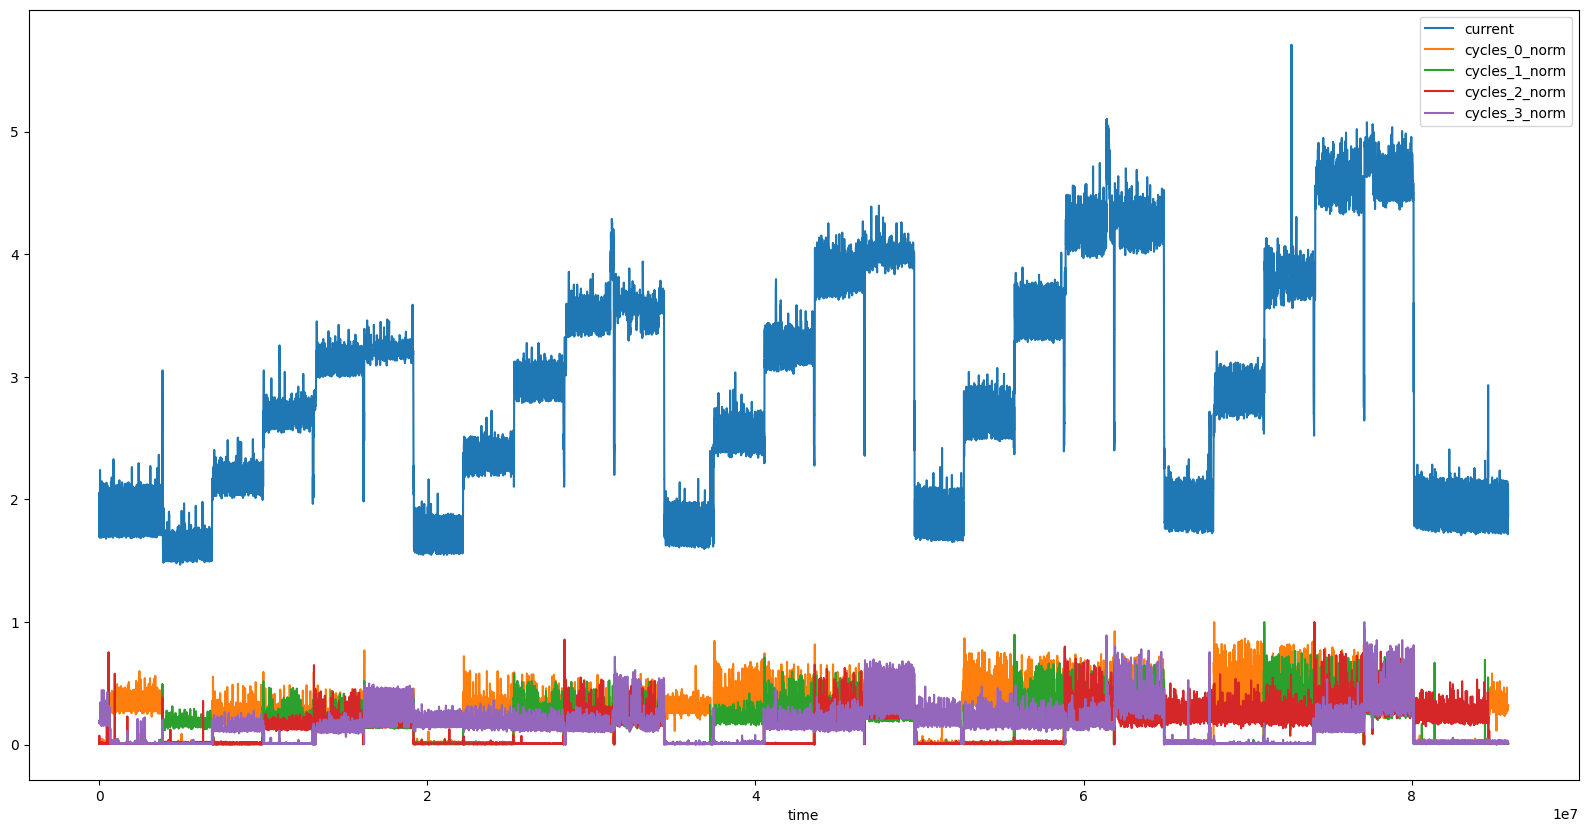

In [10]:
cpu_df['cycles_0_norm'] = min_max_scaling(cpu_df['insns_0'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_1_norm'] = min_max_scaling(cpu_df['insns_1'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_2_norm'] = min_max_scaling(cpu_df['insns_2'] / (cpu_df['time'] - cpu_df['time'].shift()))
cpu_df['cycles_3_norm'] = min_max_scaling(cpu_df['insns_3'] / (cpu_df['time'] - cpu_df['time'].shift()))

ax = cpu_df.plot(x='time', y=['current', 'cycles_0_norm', 'cycles_1_norm', 'cycles_2_norm', 'cycles_3_norm'], figsize=(20, 10))

In [12]:
mem_df = pd.read_csv('../results/numa-memcpy.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())
mem_df = mem_df.drop(index=0)

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,3335,1.932,36152,16121,5850,56,1531,253,9508,700000,...,1.837701,1.846276,0.080062,1.188617,0.165251,0.145540,0.149758,0.069342,0.132473,87.098011
2,5317,1.932,33997,15669,5784,43,1505,232,8594,700000,...,1.800375,1.800062,0.080146,1.168287,0.154153,0.147105,0.136150,0.067267,0.126169,91.019173
3,7289,1.932,38319,17774,6625,44,1780,259,10850,700000,...,2.095178,2.062149,0.096577,1.311815,0.145506,0.138662,0.139280,0.064243,0.121923,91.265720
4,9291,1.564,38959,18659,6846,43,1873,273,11231,700000,...,2.133167,2.131834,0.099861,1.339645,0.145755,0.139280,0.137715,0.064538,0.121822,90.609391
5,11282,1.564,97227,39666,15932,583,4517,990,40205,700000,...,4.970937,5.084052,0.250926,2.817331,0.219172,0.136150,0.140323,0.063781,0.139857,102.797087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10706,21978047,1.576,31202,14547,5274,40,1276,163,6477,700000,...,0.047274,1.491622,1.490196,1.005377,0.127743,0.030559,0.131054,0.128205,0.104390,137.098840
10707,21980412,1.576,31259,14545,5275,43,1267,161,6559,700000,...,0.013477,1.490630,1.488782,0.996184,0.127072,0.059428,0.128023,0.128205,0.110682,192.444397
10708,21982397,1.576,31169,14547,5271,37,1273,159,6493,700000,...,0.045694,1.509635,1.489205,1.009378,0.124902,0.032921,0.125184,0.128205,0.102803,138.382368
10709,21984381,1.648,31240,15230,5321,38,1296,166,6540,700000,...,0.047563,1.504543,1.503552,1.012129,0.128086,0.030706,0.126781,0.126781,0.103088,137.125000


In [13]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.921624
insns_0               0.843675
cache_hit_0           0.894578
cache_miss_0          0.505660
br_insns_0            0.788446
br_miss_0            -0.094107
bus_cycles_0          0.921743
freq_0                     NaN
cpu_cycles_1          0.425436
insns_1               0.326718
cache_hit_1           0.322477
cache_miss_1          0.241999
br_insns_1            0.353695
br_miss_1             0.234970
bus_cycles_1          0.423951
freq_1                     NaN
cpu_cycles_2         -0.300420
insns_2              -0.316438
cache_hit_2          -0.316701
cache_miss_2         -0.310899
br_insns_2           -0.322109
br_miss_2            -0.306567
bus_cycles_2         -0.311589
freq_2                     NaN
cpu_cycles_3         -0.029222
insns_3              -0.086262
cache_hit_3          -0.087868
cache_miss_3         -0.099886
br_insns_3           -0.106662
br_miss_3            -0.069463
bus_cycles_3         -0.056986
freq_3  

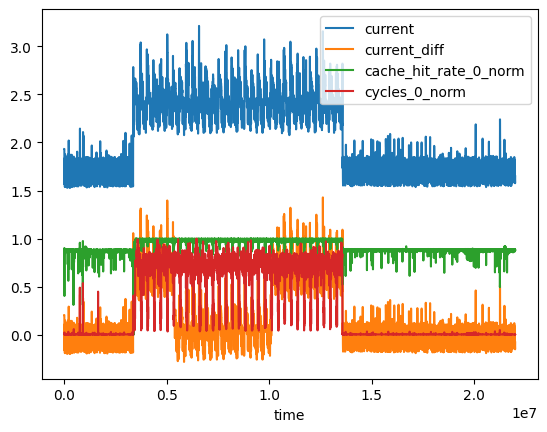

In [14]:
mem_df['cache_hit_rate_0_norm'] = min_max_scaling(mem_df['cache_hit_rate_0'])
mem_df['cycles_0_norm'] = min_max_scaling(mem_df['insns_0'] / (mem_df['time'] - mem_df['time'].shift()))
mem_df['current_diff'] = np.where((mem_df['time'] > 5350000) & (mem_df['time'] < 10100000),
                                   mem_df['current'] - 2.3588663400979706,
                                   mem_df['current'] - 1.7275771905424202)

ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])

(5000000.0, 11000000.0)

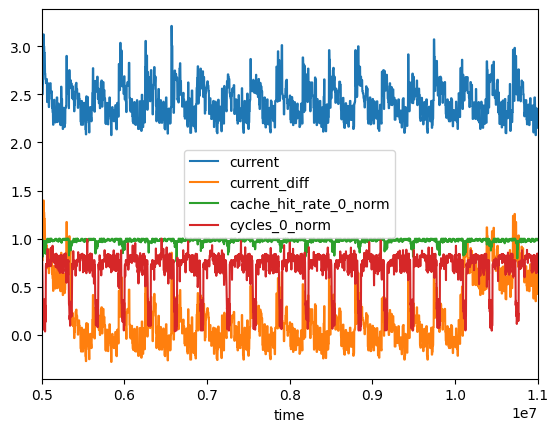

In [15]:
ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])
ax.set_xlim(5000000, 11000000)

In [16]:
mem_df = pd.read_csv('../results/numa-memrate.csv')

mem_df['cache_hit_rate_0'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_0']) / mem_df['cache_hit_0']
mem_df['cache_hit_rate_1'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_1']) / mem_df['cache_hit_1']
mem_df['cache_hit_rate_2'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_2']) / mem_df['cache_hit_2']
mem_df['cache_hit_rate_3'] = (mem_df['cache_hit_0'] - mem_df['cache_miss_3']) / mem_df['cache_hit_3']
mem_df['cache_hit_rate_avg'] = (mem_df['cache_hit_rate_0'] + mem_df['cache_hit_rate_1'] + mem_df['cache_hit_rate_2'] + mem_df['cache_hit_rate_3']) / 4

mem_df['br_miss_rate_0'] = mem_df['br_miss_0'] / mem_df['br_insns_0']
mem_df['br_miss_rate_1'] = mem_df['br_miss_1'] / mem_df['br_insns_1']
mem_df['br_miss_rate_2'] = mem_df['br_miss_2'] / mem_df['br_insns_2']
mem_df['br_miss_rate_3'] = mem_df['br_miss_3'] / mem_df['br_insns_3']
mem_df['br_miss_rate_avg'] = (mem_df['br_miss_rate_0'] + mem_df['br_miss_rate_1'] + mem_df['br_miss_rate_2'] + mem_df['br_miss_rate_3']) / 4

mem_df['clock_speed'] = (mem_df['insns_0'] + mem_df['insns_1'] + mem_df['insns_2'] + mem_df['insns_3']) / (mem_df['time'] - mem_df['time'].shift())
mem_df = mem_df.drop(index=0)

mem_df

,time,current,cpu_cycles_0,insns_0,cache_hit_0,cache_miss_0,br_insns_0,br_miss_0,bus_cycles_0,freq_0,...,cache_hit_rate_1,cache_hit_rate_2,cache_hit_rate_3,cache_hit_rate_avg,br_miss_rate_0,br_miss_rate_1,br_miss_rate_2,br_miss_rate_3,br_miss_rate_avg,clock_speed
1,3368,1.932,41019,18872,6885,48,1889,310,11902,700000,...,0.062347,2.179797,2.167668,1.350710,0.164108,0.033074,0.143317,0.147335,0.121959,133.713043
2,5342,1.932,39038,18351,6845,43,1863,275,11108,700000,...,0.065335,2.132188,2.130978,1.330555,0.147611,0.032533,0.131455,0.137931,0.112383,136.435157
3,7328,1.932,38960,18251,6798,45,1849,282,11128,700000,...,0.064819,2.116490,2.144124,1.329703,0.152515,0.033623,0.136150,0.133550,0.113960,134.765358
4,9327,1.572,78764,29040,11831,303,2962,799,31031,700000,...,0.119092,2.066667,3.688750,1.712225,0.269750,0.038197,0.182655,0.144201,0.158701,142.602301
5,11312,1.572,97525,38172,15495,607,4349,993,40257,700000,...,0.164119,4.834114,4.831928,2.697747,0.228328,0.032410,0.134585,0.141066,0.134097,145.203023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8258,17055362,1.844,31331,14643,5302,37,1283,159,6558,700000,...,1.500142,1.499858,0.069943,1.015741,0.123928,0.132479,0.126781,0.060847,0.111009,93.914157
8259,17057355,1.844,31177,14643,5305,38,1288,160,6482,700000,...,1.500994,1.500284,0.071075,1.016297,0.124224,0.128023,0.126781,0.060612,0.109910,92.601104
8260,17059612,1.696,31408,15332,5353,42,1314,164,6669,700000,...,1.514205,1.391077,0.070040,0.991869,0.124810,0.133903,0.128713,0.064885,0.113078,84.078866
8261,17061599,1.696,31215,14642,5308,37,1287,158,6489,700000,...,1.502273,1.497734,0.071525,1.016140,0.122766,0.129630,0.127479,0.063981,0.110964,92.672874


In [17]:
mem_df.drop('time', axis=1).corr()['current']

current               1.000000
cpu_cycles_0          0.823642
insns_0               0.749878
cache_hit_0           0.801461
cache_miss_0          0.403932
br_insns_0            0.651427
br_miss_0             0.300938
bus_cycles_0          0.824206
freq_0                     NaN
cpu_cycles_1          0.346640
insns_1               0.262256
cache_hit_1           0.259576
cache_miss_1          0.234749
br_insns_1            0.274593
br_miss_1             0.226178
bus_cycles_1          0.344501
freq_1                     NaN
cpu_cycles_2          0.296548
insns_2               0.279805
cache_hit_2           0.284544
cache_miss_2          0.274753
br_insns_2            0.286349
br_miss_2             0.242668
bus_cycles_2          0.292220
freq_2                     NaN
cpu_cycles_3         -0.237007
insns_3              -0.258257
cache_hit_3          -0.259616
cache_miss_3         -0.280516
br_insns_3           -0.278630
br_miss_3            -0.246036
bus_cycles_3         -0.248301
freq_3  

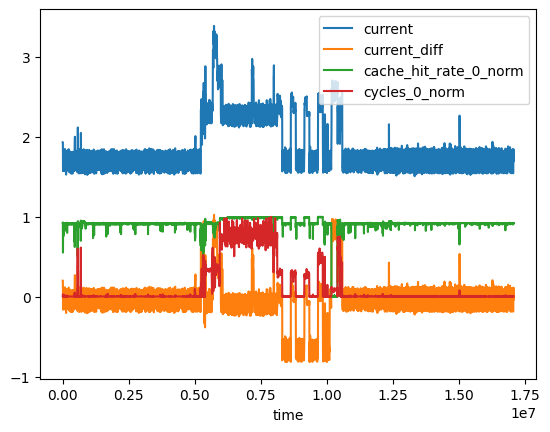

In [18]:
mem_df['cache_hit_rate_0_norm'] = min_max_scaling(mem_df['cache_hit_rate_0'])
mem_df['cycles_0_norm'] = min_max_scaling(mem_df['insns_0'] / (mem_df['time'] - mem_df['time'].shift()))
mem_df['current_diff'] = np.where((mem_df['time'] > 5350000) & (mem_df['time'] < 10100000),
                                   mem_df['current'] - 2.3588663400979706,
                                   mem_df['current'] - 1.7275771905424202)

ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])

(5000000.0, 11000000.0)

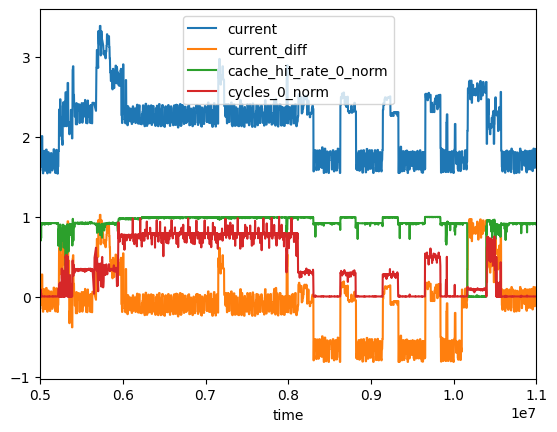

In [19]:
ax = mem_df.plot(x='time', y=['current', 'current_diff', 'cache_hit_rate_0_norm', 'cycles_0_norm'])
ax.set_xlim(5000000, 11000000)